## *Heart Failure Prediction Dataset*

#### Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

#### People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Import essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


• We have 6 'int64', 5 'object' and 1 'float64' typed attributes in this dataset

In [4]:
df.shape

(918, 12)

• Dataset consists of 918 records and 12 attributes

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Data Cleaning

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

• We see there is not any missing value.

In [7]:
df[df.duplicated() == True]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


• Also, there are not any duplicated records.

### Data Analysis and Feature Engineering

<AxesSubplot:>

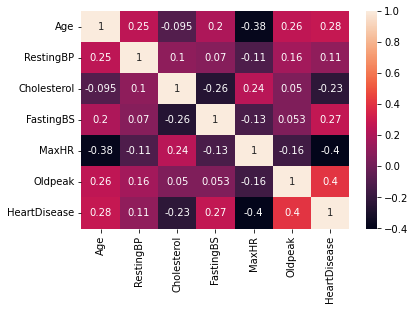

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

• HeartDisease column is pretty correlated with MaxHR and Oldpeak columns. 

In [9]:
def plot_data_distribution(df, column_name):
    #sns.catplot(data = df, x = column_name, kind="count")
    df[[column_name, 'HeartDisease']].groupby(column_name).agg('mean').sort_values('HeartDisease').plot(kind='barh')

#### 1) HeartDisease

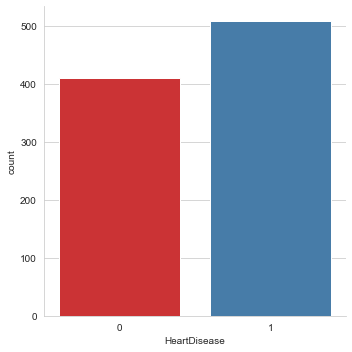

In [10]:
sns.set_style('whitegrid')
sns.catplot(data=df, x="HeartDisease", kind="count", palette='Set1')

• You can see that amount of patients with Heart Disease is higher than other one.

#### 2) Age

<AxesSubplot:ylabel='Frequency'>

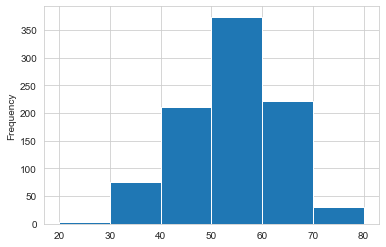

In [11]:
df['Age'].plot(kind = 'hist', bins = [20,30,40,50,60,70,80]) 

• Seems Age column is normally distributed

In [12]:
def age_cluster(a):
    if a >= 70:
        return 5
    elif a >= 60:
        return 4
    elif a >= 50:
        return 3
    elif a >= 40:
        return 2
    elif a >= 30:
        return 1
    else:
        return 0

In [13]:
df['Age'] = df['Age'].map(lambda a: age_cluster(a))
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,2,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,1,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,2,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,3,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,2,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,4,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,3,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,3,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


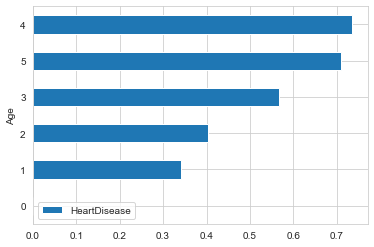

In [14]:
plot_data_distribution(df, 'Age')

• People older than 60 more tend to have some Heart Disease(with more than 70% probability)

• No people under 30 years face such disease. 

#### 3) Sex

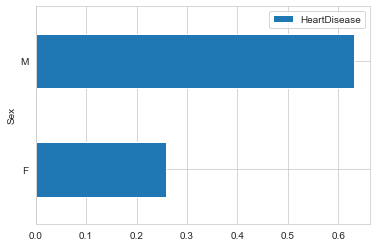

In [15]:
plot_data_distribution(df, 'Sex')

• Amount of Men is several time more than Female
• Men is more tend to have Heart Disease(with ~63% probability)

In [16]:
df['Sex'].replace({'M': 1, 'F': 0}, inplace = True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,2,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,1,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,2,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,3,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,2,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,4,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,3,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,3,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### 4) ChestPainType

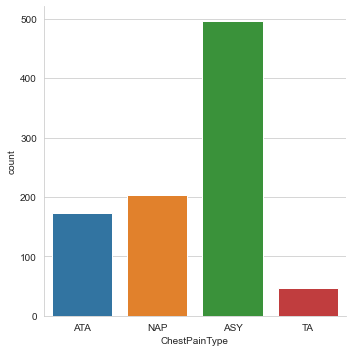

In [17]:
sns.catplot(data = df, x = 'ChestPainType', kind="count")

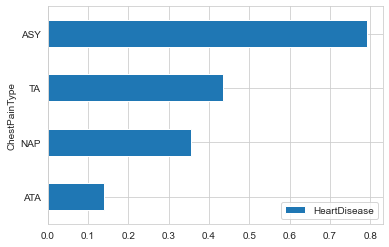

In [18]:
plot_data_distribution(df, 'ChestPainType')

• Chest Pain type 'ASY' most faced, and along with that, 
it is the most dangerous signal of heart disease, which consists of ~80% probability.

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR =Q3 - Q1
    outlier_low = df[column] < (Q1 - IQR *1.5)
    outlier_up = df[column] > (Q3 + IQR *1.5)
    df = df[~(outlier_low | outlier_up)]
    return df.reset_index(drop = True)

#### 5) RestingBP

<AxesSubplot:ylabel='Frequency'>

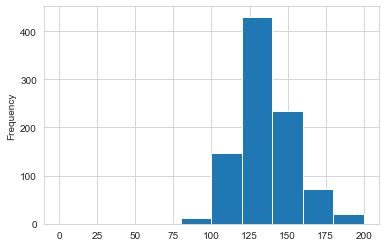

In [20]:
df['RestingBP'].plot(kind = 'hist', bins = [0,20,40,60,80,100,120,140,160,180,200]) 

<AxesSubplot:xlabel='RestingBP'>

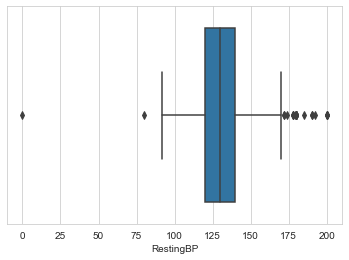

In [21]:
sns.boxplot(x = df['RestingBP'])

• We see outlier with '0' blood pressure value, so I will remove it.

In [22]:
df = df[df['RestingBP'] > 75].reset_index(drop = True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,2,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,1,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,2,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,3,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
913,4,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
914,3,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
915,3,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<AxesSubplot:xlabel='RestingBP'>

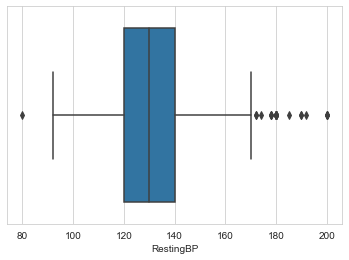

In [23]:
sns.boxplot(x = df['RestingBP'])

In [24]:
def BP_cluster(a):
    if a >= 175:
        return 4
    elif a >= 150:
        return 3
    elif a >= 125:
        return 2
    elif a >= 100:
        return 1
    else:
        return 0
    

In [25]:
df['RestingBP'] = df['RestingBP'].map(lambda a: BP_cluster(a))
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,ATA,2,289,0,Normal,172,N,0.0,Up,0
1,2,0,NAP,3,180,0,Normal,156,N,1.0,Flat,1
2,1,1,ATA,2,283,0,ST,98,N,0.0,Up,0
3,2,0,ASY,2,214,0,Normal,108,Y,1.5,Flat,1
4,3,1,NAP,3,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,TA,1,264,0,Normal,132,N,1.2,Flat,1
913,4,1,ASY,2,193,1,Normal,141,N,3.4,Flat,1
914,3,1,ASY,2,131,0,Normal,115,Y,1.2,Flat,1
915,3,0,ATA,2,236,0,LVH,174,N,0.0,Flat,1


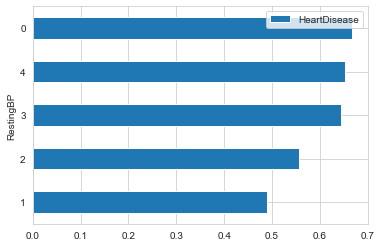

In [26]:
plot_data_distribution(df, 'RestingBP')

• People with low blood pressure and ,in opposite, with high blood pressure more likely have heart disease.

#### 6) Cholesterol

In [27]:
df['Cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

<AxesSubplot:ylabel='Frequency'>

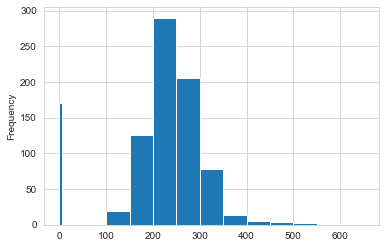

In [28]:
df['Cholesterol'].plot(kind = 'hist', bins = [0,5,10,50,100,150,200,250,300,350,400,450,500,550,600,650]) 

<AxesSubplot:xlabel='Cholesterol'>

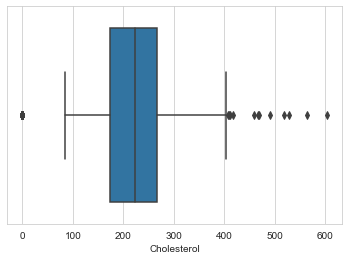

In [29]:
sns.boxplot(x = df['Cholesterol'])

In [30]:
# df = df[df['Cholesterol'] > 5].reset_index(drop = True)
# df

In [31]:
def Cholesterol_cluster(a):
    if a >= 530:
        return 6
    elif a >= 440:
        return 5
    elif a >= 350:
        return 4
    elif a >= 260:
        return 3
    elif a >= 170:
        return 2
    elif a >= 80:
        return 1
    else:
        return 0

In [32]:
df['Cholesterol'] = df['Cholesterol'].map(lambda a: Cholesterol_cluster(a))
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,ATA,2,3,0,Normal,172,N,0.0,Up,0
1,2,0,NAP,3,2,0,Normal,156,N,1.0,Flat,1
2,1,1,ATA,2,3,0,ST,98,N,0.0,Up,0
3,2,0,ASY,2,2,0,Normal,108,Y,1.5,Flat,1
4,3,1,NAP,3,2,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,TA,1,3,0,Normal,132,N,1.2,Flat,1
913,4,1,ASY,2,2,1,Normal,141,N,3.4,Flat,1
914,3,1,ASY,2,1,0,Normal,115,Y,1.2,Flat,1
915,3,0,ATA,2,2,0,LVH,174,N,0.0,Flat,1


#### 7) FastingBS

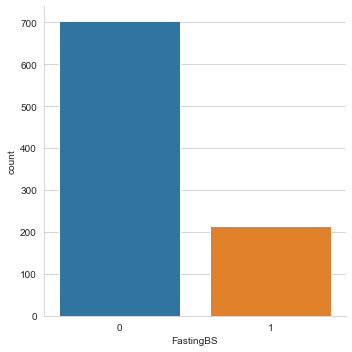

In [33]:
sns.catplot(data = df, x = 'FastingBS', kind="count")

• Most of people in record have less than 120 mg/dl blood sugar

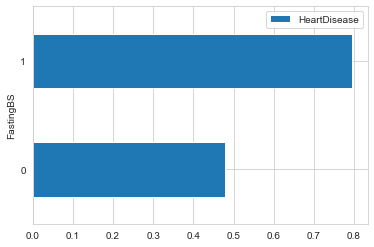

In [34]:
plot_data_distribution(df, 'FastingBS')

• People, who have more than 120 mg/dl blood sugar, tend to have heart disease.

#### 8) RestingECG

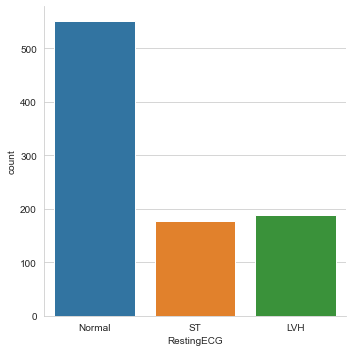

In [35]:
sns.catplot(data = df, x = 'RestingECG', kind="count")

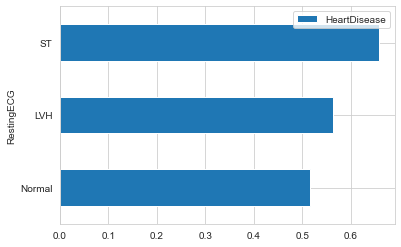

In [36]:
plot_data_distribution(df, 'RestingECG')

• People with normal electrocardiogram results have lower probability to face heart desease

#### 9) MaxHR

In [37]:
df['MaxHR'].describe()

count    917.000000
mean     136.789531
std       25.467129
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

<AxesSubplot:ylabel='Frequency'>

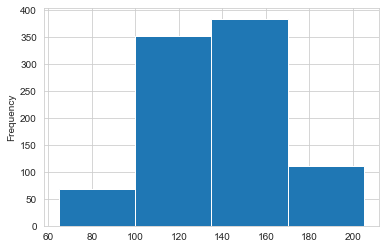

In [38]:
df['MaxHR'].plot(kind = 'hist', bins = [65,100,135,170,205]) 

<AxesSubplot:xlabel='MaxHR'>

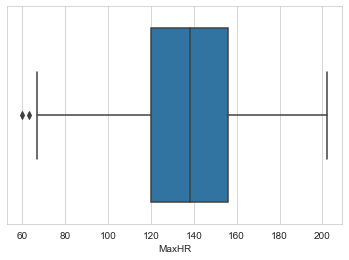

In [39]:
sns.boxplot(x = df['MaxHR'])

In [40]:
def MaxHR_cluster(a):
    if a >= 170:
        return 3
    elif a >= 135:
        return 2
    elif a >= 100:
        return 1
    else:
        return 0

In [41]:
df['MaxHR'] = df['MaxHR'].map(lambda a: MaxHR_cluster(a))
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,ATA,2,3,0,Normal,3,N,0.0,Up,0
1,2,0,NAP,3,2,0,Normal,2,N,1.0,Flat,1
2,1,1,ATA,2,3,0,ST,0,N,0.0,Up,0
3,2,0,ASY,2,2,0,Normal,1,Y,1.5,Flat,1
4,3,1,NAP,3,2,0,Normal,1,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,TA,1,3,0,Normal,1,N,1.2,Flat,1
913,4,1,ASY,2,2,1,Normal,2,N,3.4,Flat,1
914,3,1,ASY,2,1,0,Normal,1,Y,1.2,Flat,1
915,3,0,ATA,2,2,0,LVH,3,N,0.0,Flat,1


#### 10) ExerciseAngina

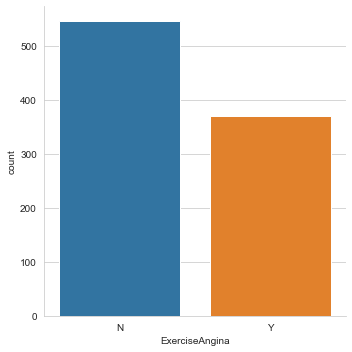

In [42]:
sns.catplot(data = df, x = 'ExerciseAngina', kind="count")

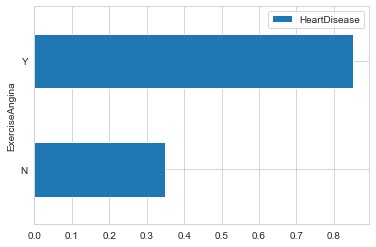

In [43]:
plot_data_distribution(df, 'ExerciseAngina')

• People, who faced with exercise-induced angina, more tended to heart desease

In [44]:
df['ExerciseAngina'].replace({'Y': 1, 'N': 0}, inplace = True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,ATA,2,3,0,Normal,3,0,0.0,Up,0
1,2,0,NAP,3,2,0,Normal,2,0,1.0,Flat,1
2,1,1,ATA,2,3,0,ST,0,0,0.0,Up,0
3,2,0,ASY,2,2,0,Normal,1,1,1.5,Flat,1
4,3,1,NAP,3,2,0,Normal,1,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,TA,1,3,0,Normal,1,0,1.2,Flat,1
913,4,1,ASY,2,2,1,Normal,2,0,3.4,Flat,1
914,3,1,ASY,2,1,0,Normal,1,1,1.2,Flat,1
915,3,0,ATA,2,2,0,LVH,3,0,0.0,Flat,1


#### 11) Oldpeak

In [45]:
df['Oldpeak'].describe()

count    917.000000
mean       0.886696
std        1.066960
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

<AxesSubplot:ylabel='Frequency'>

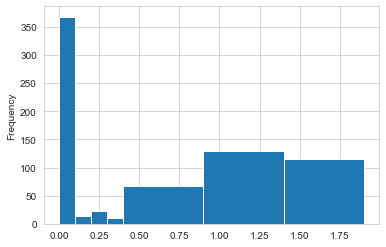

In [46]:
df['Oldpeak'].plot(kind = 'hist', bins = [0, 0.1, 0.2,0.3,0.4,0.9,1.4,1.9]) 

<AxesSubplot:xlabel='Oldpeak'>

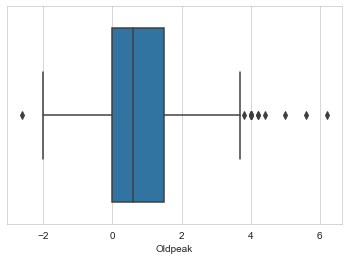

In [47]:
sns.boxplot(x = df['Oldpeak'])

df = df[df['Oldpeak'] >= 0].reset_index(drop = True)
df

In [48]:
def Oldpeak_cluster(a):
    if a >= 4:
        return 10
    elif a >= 3.5:
        return 9
    elif a >= 3:
        return 8
    elif a >= 2.5:
        return 7
    elif a >= 2:
        return 6
    elif a >= 1.5:
        return 5
    elif a >= 1:
        return 4
    elif a >= 0.5:
        return 3
    elif a >= 0:
        return 2
    elif a >= -1:
        return 1
    else:
        return 0

In [49]:
df['Oldpeak'] = df['Oldpeak'].map(lambda a: Oldpeak_cluster(a))
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,ATA,2,3,0,Normal,3,0,2,Up,0
1,2,0,NAP,3,2,0,Normal,2,0,4,Flat,1
2,1,1,ATA,2,3,0,ST,0,0,2,Up,0
3,2,0,ASY,2,2,0,Normal,1,1,5,Flat,1
4,3,1,NAP,3,2,0,Normal,1,0,2,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,TA,1,3,0,Normal,1,0,4,Flat,1
913,4,1,ASY,2,2,1,Normal,2,0,8,Flat,1
914,3,1,ASY,2,1,0,Normal,1,1,4,Flat,1
915,3,0,ATA,2,2,0,LVH,3,0,2,Flat,1


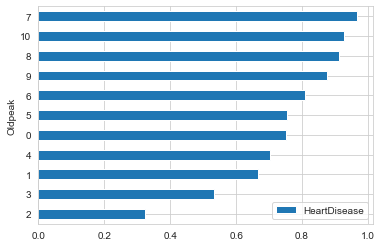

In [50]:
plot_data_distribution(df, 'Oldpeak')

• People with high ST depression more tend to this disease.

#### 12) ST_Slope

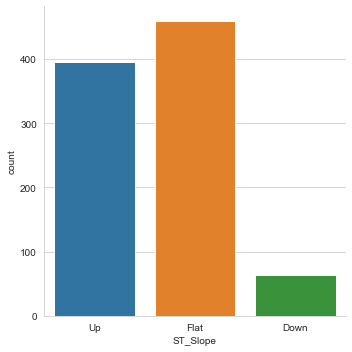

In [51]:
sns.catplot(data = df, x = 'ST_Slope', kind="count")

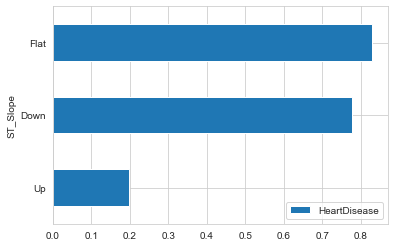

In [52]:
plot_data_distribution(df, 'ST_Slope')

• People with flat slop ST with ~80% probability tend to have heart disease

Final dataset looks like:

In [53]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,ATA,2,3,0,Normal,3,0,2,Up,0
1,2,0,NAP,3,2,0,Normal,2,0,4,Flat,1
2,1,1,ATA,2,3,0,ST,0,0,2,Up,0
3,2,0,ASY,2,2,0,Normal,1,1,5,Flat,1
4,3,1,NAP,3,2,0,Normal,1,0,2,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,TA,1,3,0,Normal,1,0,4,Flat,1
913,4,1,ASY,2,2,1,Normal,2,0,8,Flat,1
914,3,1,ASY,2,1,0,Normal,1,1,4,Flat,1
915,3,0,ATA,2,2,0,LVH,3,0,2,Flat,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             917 non-null    int64 
 1   Sex             917 non-null    int64 
 2   ChestPainType   917 non-null    object
 3   RestingBP       917 non-null    int64 
 4   Cholesterol     917 non-null    int64 
 5   FastingBS       917 non-null    int64 
 6   RestingECG      917 non-null    object
 7   MaxHR           917 non-null    int64 
 8   ExerciseAngina  917 non-null    int64 
 9   Oldpeak         917 non-null    int64 
 10  ST_Slope        917 non-null    object
 11  HeartDisease    917 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 86.1+ KB


Let's implement One-Hot Encoder to 'object' typed columns.

In [55]:
l = list(df.select_dtypes(include = 'object'))
for i in l:
    df[i] = df[i].astype('category')
df = pd.get_dummies(df)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,2,1,2,3,0,3,0,2,0,0,1,0,0,0,1,0,0,0,1
1,2,0,3,2,0,2,0,4,1,0,0,1,0,0,1,0,0,1,0
2,1,1,2,3,0,0,0,2,0,0,1,0,0,0,0,1,0,0,1
3,2,0,2,2,0,1,1,5,1,1,0,0,0,0,1,0,0,1,0
4,3,1,3,2,0,1,0,2,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,1,3,0,1,0,4,1,0,0,0,1,0,1,0,0,1,0
913,4,1,2,2,1,2,0,8,1,1,0,0,0,0,1,0,0,1,0
914,3,1,2,1,0,1,1,4,1,1,0,0,0,0,1,0,0,1,0
915,3,0,2,2,0,3,0,2,1,0,1,0,0,1,0,0,0,1,0


Find Correlation

<AxesSubplot:>

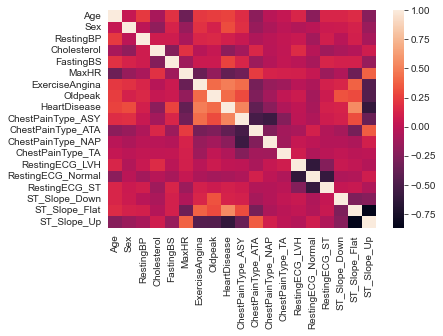

In [56]:
sns.heatmap(df.corr())

### Split dataset into Training and Testing sets

In [57]:
X = df.drop(['HeartDisease'], axis = 1)
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,2,1,2,3,0,3,0,2,0,1,0,0,0,1,0,0,0,1
1,2,0,3,2,0,2,0,4,0,0,1,0,0,1,0,0,1,0
2,1,1,2,3,0,0,0,2,0,1,0,0,0,0,1,0,0,1
3,2,0,2,2,0,1,1,5,1,0,0,0,0,1,0,0,1,0
4,3,1,3,2,0,1,0,2,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,1,1,3,0,1,0,4,0,0,0,1,0,1,0,0,1,0
913,4,1,2,2,1,2,0,8,1,0,0,0,0,1,0,0,1,0
914,3,1,2,1,0,1,1,4,1,0,0,0,0,1,0,0,1,0
915,3,0,2,2,0,3,0,2,0,1,0,0,1,0,0,0,1,0


In [58]:
y = df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
912    1
913    1
914    1
915    1
916    0
Name: HeartDisease, Length: 917, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

#### Implement Standart Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
scaled_X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)

In [62]:
scaled_X_test = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

In [63]:
X_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.097598,0.517231,0.186734,-0.778332,1.800206,-0.762782,1.224002,0.170953,0.922904,-0.466996,-0.553248,-0.221032,2.022100,-1.224002,-0.505907,-0.280166,1.022078,-0.883059
1,-0.918306,0.517231,1.469594,0.099688,-0.555492,1.774900,-0.816992,0.654265,0.922904,-0.466996,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,-0.978399,1.132427
2,0.097598,0.517231,0.186734,0.977708,-0.555492,0.506059,-0.816992,-0.795670,-1.083536,2.141347,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,-0.978399,1.132427
3,1.113501,0.517231,-1.096126,-1.656352,-0.555492,-2.031624,1.224002,-0.795670,-1.083536,-0.466996,1.807507,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
4,0.097598,0.517231,1.469594,0.099688,1.800206,-2.031624,-0.816992,-0.795670,-1.083536,-0.466996,1.807507,-0.221032,-0.494535,-1.224002,1.976649,-0.280166,1.022078,-0.883059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,1.113501,-1.933373,0.186734,0.977708,-0.555492,-0.762782,-0.816992,1.137576,0.922904,-0.466996,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
683,0.097598,0.517231,-1.096126,0.099688,-0.555492,0.506059,-0.816992,-0.795670,0.922904,-0.466996,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
684,1.113501,-1.933373,-1.096126,0.099688,-0.555492,0.506059,1.224002,-0.795670,0.922904,-0.466996,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
685,-1.934209,0.517231,-1.096126,0.099688,-0.555492,0.506059,1.224002,0.170953,-1.083536,2.141347,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059


In [64]:
X_test

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1.113501,0.517231,0.186734,0.099688,1.800206,0.506059,-0.816992,-0.795670,-1.083536,2.141347,-0.553248,-0.221032,2.022100,-1.224002,-0.505907,-0.280166,-0.978399,1.132427
1,0.097598,0.517231,0.186734,0.099688,-0.555492,-0.762782,1.224002,0.170953,0.922904,-0.466996,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
2,-1.934209,0.517231,-1.096126,0.099688,-0.555492,1.774900,-0.816992,-0.795670,-1.083536,-0.466996,-0.553248,4.524240,2.022100,-1.224002,-0.505907,-0.280166,-0.978399,1.132427
3,-2.950112,0.517231,0.186734,0.099688,-0.555492,1.774900,-0.816992,-0.795670,-1.083536,2.141347,-0.553248,-0.221032,2.022100,-1.224002,-0.505907,-0.280166,-0.978399,1.132427
4,1.113501,0.517231,1.469594,-1.656352,-0.555492,-0.762782,1.224002,1.137576,0.922904,-0.466996,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.097598,-1.933373,0.186734,0.099688,-0.555492,-0.762782,-0.816992,0.170953,-1.083536,2.141347,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
226,-0.918306,-1.933373,0.186734,0.099688,1.800206,1.774900,-0.816992,-0.795670,-1.083536,-0.466996,1.807507,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
227,1.113501,-1.933373,0.186734,0.977708,-0.555492,0.506059,1.224002,0.170953,0.922904,-0.466996,-0.553248,-0.221032,-0.494535,0.816992,-0.505907,-0.280166,1.022078,-0.883059
228,1.113501,-1.933373,-1.096126,0.099688,-0.555492,-0.762782,-0.816992,0.654265,-1.083536,-0.466996,1.807507,-0.221032,2.022100,-1.224002,-0.505907,-0.280166,1.022078,-0.883059


### Build the Model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### Support Vector Machine

In [66]:
SVM_clf = SVC()
SVM_clf.fit(X_train, y_train)
prediction = SVM_clf.predict(X_test)

In [67]:
confusion_matrix(y_test, prediction)

array([[ 79,  18],
       [ 16, 117]], dtype=int64)

In [68]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        97
           1       0.87      0.88      0.87       133

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [69]:
print('Accuracy of Logistic Regression : ', round(100 * accuracy_score(y_test, prediction), 2), '%', sep ='')

Accuracy of Logistic Regression : 85.22%


#### Logistic Regression

In [70]:
logistic_regressor = LogisticRegression()
lg_clf = logistic_regressor.fit(X_train,y_train)
lg_clf.fit(X_train, y_train)
prediction = lg_clf.predict(X_test)

In [71]:
confusion_matrix(y_test, prediction)

array([[ 83,  14],
       [ 21, 112]], dtype=int64)

In [72]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        97
           1       0.89      0.84      0.86       133

    accuracy                           0.85       230
   macro avg       0.84      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [73]:
print('Accuracy of Logistic Regression : ', round(100 * accuracy_score(y_test, prediction), 2), '%', sep ='')

Accuracy of Logistic Regression : 84.78%


#### Random Forest Classication

In [74]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
prediction = forest_clf.predict(X_test)

In [75]:
confusion_matrix(y_test, prediction)

array([[ 80,  17],
       [ 16, 117]], dtype=int64)

In [76]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83        97
           1       0.87      0.88      0.88       133

    accuracy                           0.86       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



In [77]:
print('Accuracy of Random Forest : ', round(100 * accuracy_score(y_test, prediction), 2), '%', sep ='')

Accuracy of Random Forest : 85.65%


#### Decision Tree

In [78]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
prediction = tree_clf.predict(X_test)

In [79]:
confusion_matrix(y_test, prediction)

array([[ 81,  16],
       [ 12, 121]], dtype=int64)

In [80]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        97
           1       0.88      0.91      0.90       133

    accuracy                           0.88       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.88      0.88       230



In [81]:
print('Accuracy of Decision Tree : ', round(100 * accuracy_score(y_test, prediction), 2), '%', sep ='')

Accuracy of Decision Tree : 87.83%
